In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df=pd.read_csv("kmean.csv")
df.head()

,No,x,y,z
0,1,2,10,5
1,2,10,9,6
2,3,11,1,10
3,4,7,8,9
4,5,5,4,13


In [ ]:
X=df['x'].to_numpy()
Y=df['y'].to_numpy()
Z=df['z'].to_numpy()
print(X)
print(Y)
print(Z)

[ 2 10 11  7  5  3 20 13 16 17]
[10  9  1  8  4 29 16  6  2  7]
[ 5  6 10  9 13 11 17 20 14 15]


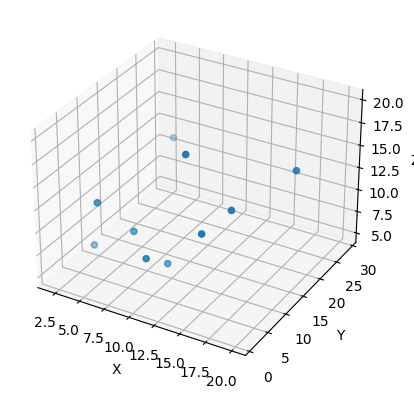

In [ ]:
# Create a figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(X, Y, Z)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [ ]:
print("No of cluster: ")
k = int(input())

No of cluster: 
2


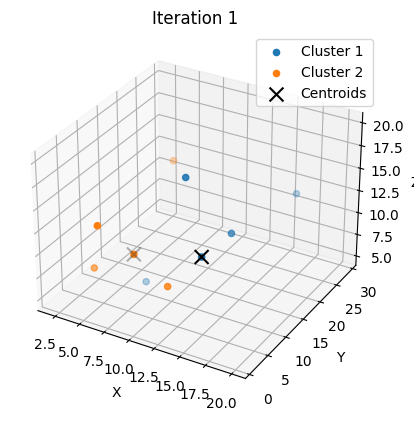

Cluster 1:
(11, 1, 10)
(20, 16, 17)
(13, 6, 20)
(16, 2, 14)
(17, 7, 15)
Centroid: [16  2 14]

Cluster 2:
(2, 10, 5)
(10, 9, 6)
(7, 8, 9)
(5, 4, 13)
(3, 29, 11)
Centroid: [7 8 9]



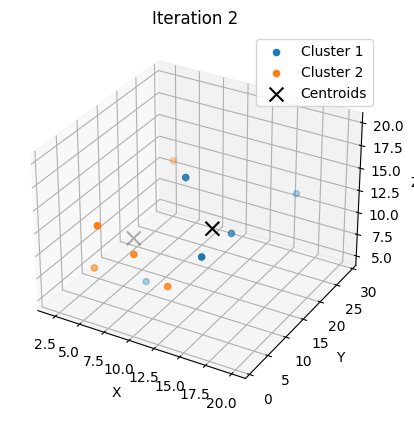

Cluster 1:
(11, 1, 10)
(20, 16, 17)
(13, 6, 20)
(16, 2, 14)
(17, 7, 15)
Centroid: [15.4, 6.4, 15.2]

Cluster 2:
(2, 10, 5)
(10, 9, 6)
(7, 8, 9)
(5, 4, 13)
(3, 29, 11)
Centroid: [5.4, 12.0, 8.8]

Converged after 2 iterations.


In [ ]:
# Initialize centroids randomly
centroid_idx = np.random.choice(range(len(X)), k, replace=False)
centroid = np.array([[X[i], Y[i], Z[i]] for i in centroid_idx])

# K-means Clustering Algorithm
def distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.linalg.norm(point1 - point2)

def k_means_clustering(X, Y, Z, k, max_iterations=10):
    global centroid  # Make centroid variable global

    for iteration in range(max_iterations):
        # Assign data points to the nearest centroid
        labels = []
        for x, y, z in zip(X, Y, Z):
            distances = [distance([x, y, z], c) for c in centroid]
            label = np.argmin(distances)
            labels.append(label)

        # Plot the clusters and centroids for each iteration
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i in range(k):
            cluster_points = [(X[j], Y[j], Z[j]) for j in range(len(X)) if labels[j] == i]
            cluster_x = [point[0] for point in cluster_points]
            cluster_y = [point[1] for point in cluster_points]
            cluster_z = [point[2] for point in cluster_points]
            ax.scatter(cluster_x, cluster_y, cluster_z, label=f'Cluster {i+1}')
        ax.scatter([c[0] for c in centroid], [c[1] for c in centroid], [c[2] for c in centroid], marker='x', s=100, c='black', label='Centroids')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f"Iteration {iteration+1}")
        ax.legend()
        plt.show()

        # Print the clusters and their centroids
        for i in range(k):
            cluster_points = [(X[j], Y[j], Z[j]) for j in range(len(X)) if labels[j] == i]
            print(f"Cluster {i+1}:")
            for point in cluster_points:
                print(point)
            print(f"Centroid: {centroid[i]}")
            print()

        # Update centroids
        new_centroid = []
        for i in range(k):
            cluster_points = [(X[j], Y[j], Z[j]) for j in range(len(X)) if labels[j] == i]
            if len(cluster_points) == 0:
                idx = np.random.choice(range(len(X)))
                new_centroid.append([X[idx], Y[idx], Z[idx]])
            else:
                mean_x = np.mean([point[0] for point in cluster_points])
                mean_y = np.mean([point[1] for point in cluster_points])
                mean_z = np.mean([point[2] for point in cluster_points])
                new_centroid.append([mean_x, mean_y, mean_z])

        # Check for convergence
        if np.all(centroid == new_centroid):
            print(f"Converged after {iteration+1} iterations.")
            break

        centroid = new_centroid

    return labels, centroid

# Apply k-means clustering
labels, centroids = k_means_clustering(X, Y, Z, k)



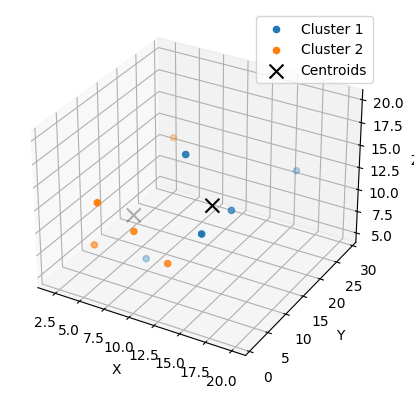

Cluster 1:
(11, 1, 10)
(20, 16, 17)
(13, 6, 20)
(16, 2, 14)
(17, 7, 15)
Centroid: [15.4, 6.4, 15.2]

Cluster 2:
(2, 10, 5)
(10, 9, 6)
(7, 8, 9)
(5, 4, 13)
(3, 29, 11)
Centroid: [5.4, 12.0, 8.8]



In [ ]:
# Final plot with clusters and centroids
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
    cluster_points = [(X[j], Y[j], Z[j]) for j in range(len(X)) if labels[j] == i]
    cluster_x = [point[0] for point in cluster_points]
    cluster_y = [point[1] for point in cluster_points]
    cluster_z = [point[2] for point in cluster_points]
    ax.scatter(cluster_x, cluster_y, cluster_z, label=f'Cluster {i+1}')
ax.scatter([c[0] for c in centroids], [c[1] for c in centroids], [c[2] for c in centroids], marker='x', s=100, c='black', label='Centroids')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


# Print the clusters and their centroids
for i in range(k):
    cluster_points = [(X[j], Y[j], Z[j]) for j in range(len(X)) if labels[j] == i]
    print(f"Cluster {i+1}:")
    for point in cluster_points:
        print(point)
    print(f"Centroid: {centroid[i]}")
    print()